# Data Visualization EDA

## *Overview*
Public and non-profit enitities are eligible to receive Health Center Program grant funding to provide medical, dental, and mental health services to underserved individuals across the United States and its territories. Entities that receive this funding are charged with increasing access to quality health care services to medically underserved populations. 

In this notebook, I will visually explore the relationships between various features of each entity and whether they are correlated with the total health center funding an entity receives. 

In [30]:
import sys
import os

# Get the current working directory
current_dir = os.getcwd()

# Add the parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.insert(0, parent_dir)

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from configuration.config import DATA_PATH

In [32]:
health_centers = pd.read_csv(DATA_PATH + 'clean_data_v1.csv')
health_centers_geo = pd.read_csv(DATA_PATH + 'health_center_combined.csv', 
                                 usecols=['BHCMISID', 'GrantNumber', 'HealthCenterName', 'HealthCenterCity', 'HealthCenterState', 'HealthCenterZIPCode'])



In [33]:
health_centers.columns

Index(['BHCMISID', 'GrantNumber', 'HealthCenterName', 'FundingCHC',
       'FundingMHC', 'FundingHO', 'FundingPH', 'UrbanRuralFlag', 'mhc_amount',
       'chc_amount', 'ho_amount', 'ph_amount', 'total_hc_funding',
       'bphc_total', 'total_other_federal_grants', 'total_state_grants',
       'total_local_gov_grants', 'total_private_grants', 'total_other_revenue',
       'total_revenue', 'total_male', 'total_female', 'asian',
       'native_hawaiian', 'pac_isl', 'black', 'am_ind', 'white', 'unreported',
       'hispanic_any_race', 'total_patients', 'lep_patients', 'fpl_100_below',
       'fpl_101_to_150', 'fpl_151_to_200', 'fpl_over_200', 'fpl_unknown',
       'uninsured_0_17', 'uninsured_18_up', 'medicaid_0_17', 'medicaid_18_up',
       'medicare_18_up', 'public_insurance_0_17', 'public_insurance_18_up',
       'private_insurance_0_17', 'private_insurance_18_up', 'total_0_17',
       'total_18_up', 'migrant_patients', 'homeless_patients',
       'school_based_patients', 'veteran_patie

In [34]:
health_centers.head(3)

,BHCMISID,GrantNumber,HealthCenterName,FundingCHC,FundingMHC,FundingHO,FundingPH,UrbanRuralFlag,mhc_amount,chc_amount,...,enabling_virtual_visits,enabling_patients,total_clinic_visits,total_virtual_visits,ZipCode_Count,SiteCity_Count,SiteState_Count,Admin_Service_Delivery_Sites_Count,Service_Delivery_Sites_Count,TotalWeeklyHoursOfOperation
0,010030,H80CS00803,"HOLYOKE HEALTH CENTER, INC.",1,0,0,0,Urban,0,5721128,...,5659.0,4561.0,71491.0,27773.0,50,3.0,1.0,0.0,4.0,175.0
1,010040,H80CS00443,MAINE MOBILE HEALTH PROGRAM INC.,0,1,0,0,Rural,1758567,0,...,175.0,263.0,2381.0,192.0,24,2.0,1.0,4.0,2.0,195.0
2,010060,H80CS00741,"FAIR HAVEN COMMUNITY HEALTH CLINIC, INC.",1,0,0,0,Urban,0,4569124,...,5057.0,3539.0,96387.0,27893.0,62,3.0,1.0,1.0,16.0,603.0


I first want to take a look at the distribution of health center funding, total patients served, and any correlation between these variables across entities. I also want to see if there are any particular clusters around funding and whether an entity is considered a rural or urban provider. 

/Users/katialopes-gilbert/opt/anaconda3/envs/data-course/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


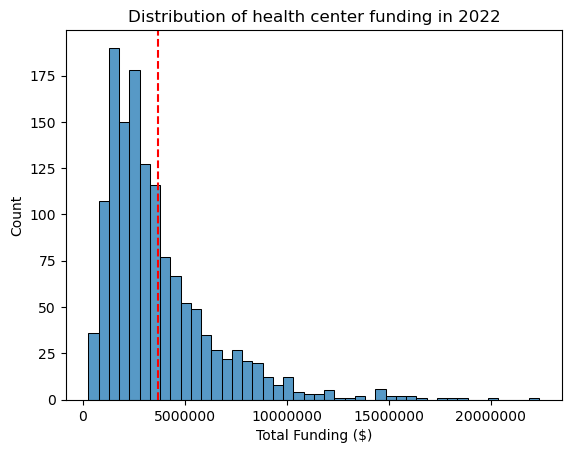

In [35]:
# plot a health center funding histogram
fig, ax = plt.subplots()
sns.histplot(x='total_hc_funding', data=health_centers)
plt.title('Distribution of health center funding in 2022')
plt.xlabel('Total Funding ($)')
plt.axvline(health_centers['total_hc_funding'].mean(), linestyle='--', color='r')
ax.ticklabel_format(style='plain', axis='both')

In [36]:
health_centers[['BHCMISID', 'HealthCenterName', 'total_hc_funding', 'mhc_amount',
                'chc_amount', 'ho_amount', 'ph_amount', 'total_patients']]\
                    .sort_values('total_hc_funding', ascending=False)\
                    .merge(health_centers_geo[['BHCMISID', 'HealthCenterName', 'HealthCenterCity', 'HealthCenterState']], 
                           on=['BHCMISID', 'HealthCenterName']).head(10)

,BHCMISID,HealthCenterName,total_hc_funding,mhc_amount,chc_amount,ho_amount,ph_amount,total_patients,HealthCenterCity,HealthCenterState
0,021510,"HUDSON RIVER HEALTH CARE, INC.",22382349,5067899,11036438,5659706,618306,239574,Peekskill,NY
1,101030,YAKIMA VALLEY FARMWORKERS CLINIC,20027136,11713719,8313417,0,0,194947,Toppenish,WA
2,090390,CLINICA SIERRA VISTA,18550279,11768297,5049386,1732596,0,127562,Bakersfield,CA
3,053020,"WEST SIDE COMMUNITY HEALTH SERVICES, INC. DBA ...",18186915,0,13379335,3226814,1580766,36480,Saint Paul,MN
4,093120,"FAMILY HEALTH CENTERS OF SAN DIEGO, INC.",17391316,0,11506593,5339102,545621,161436,San Diego,CA
5,0218870,"SUNSET PARK HEALTH COUNCIL, INC",16578577,0,12995708,3582869,0,148873,Brooklyn,NY
6,053320,SIHF HEALTHCARE,16097266,374874,13522707,1359990,839695,91759,E Saint Louis,IL
7,080060,DENVER HEALTH & HOSPITAL AUTHORITY,16009324,0,16009324,0,0,189225,Denver,CO
8,093640,FAMILY HEALTHCARE NETWORK,15792881,11055017,4737864,0,0,235786,Visalia,CA
9,044120,"QUALITY OF LIFE HEALTH SERVICES, INC.",15507740,3411703,10855418,0,1240619,22212,Gadsden,AL


In [37]:
health_centers[['total_hc_funding',
       'bphc_total', 'total_other_federal_grants', 'total_state_grants', 'total_local_gov_grants',
       'total_private_grants', 'total_other_revenue', 'total_revenue']].describe().apply(lambda s: s.apply('{0:.2f}'.format))

,total_hc_funding,bphc_total,total_other_federal_grants,total_state_grants,total_local_gov_grants,total_private_grants,total_other_revenue,total_revenue
count,1370.00,1370.00,1370.00,1370.00,1370.00,1370.00,1370.00,1370.00
mean,3680375.18,6083818.79,436239.39,762134.93,663975.56,789697.27,1085496.32,10502179.81
std,2742484.89,5085304.63,1276170.74,1611098.48,2403658.03,1617238.87,11669837.02,17029869.00
min,275778.00,358149.00,0.00,0.00,0.00,0.00,0.00,828062.00
25%,1806490.25,2972587.00,0.00,0.00,0.00,15000.00,14649.75,4132924.25
50%,2878258.50,4554745.50,0.00,177436.00,0.00,212104.00,134991.50,6656907.00
75%,4605680.25,7326313.00,241087.25,757408.00,300000.00,858781.25,546141.25,12394355.25
max,22382349.00,48065368.00,13597206.00,19982632.00,48056004.00,22007477.00,415573508.00,485335878.00


/Users/katialopes-gilbert/opt/anaconda3/envs/data-course/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


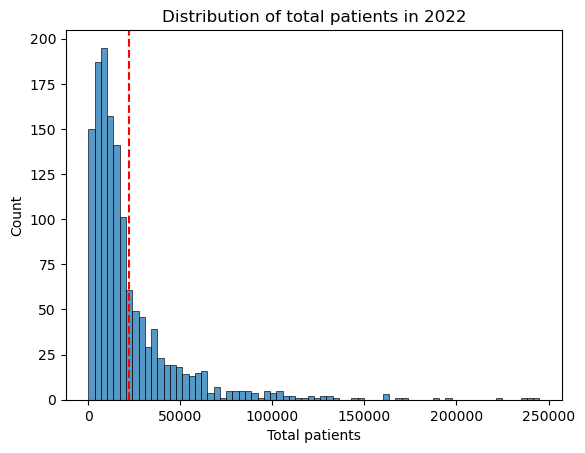

In [38]:

fix, ax = plt.subplots()
sns.histplot(x='total_patients', data=health_centers)
plt.title('Distribution of total patients in 2022')
plt.xlabel('Total patients')
plt.axvline(health_centers['total_patients'].mean(), linestyle='--', color='r')
ax.ticklabel_format(style='plain', axis='both')

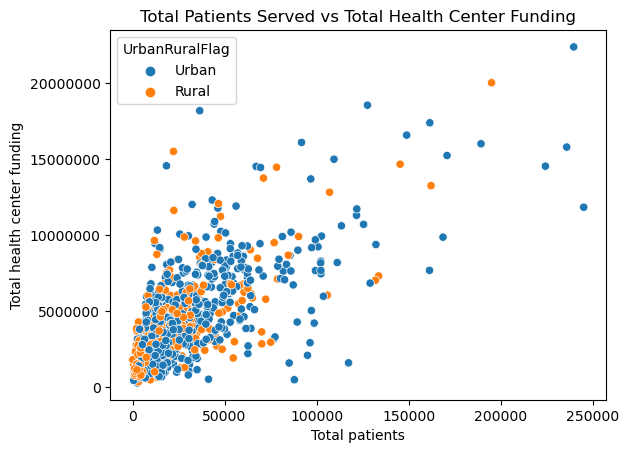

In [39]:
fix, ax = plt.subplots()

sns.scatterplot(x='total_patients', y='total_hc_funding', data=health_centers, hue='UrbanRuralFlag')
plt.title('Total Patients Served vs Total Health Center Funding')
plt.xlabel('Total patients')
plt.ylabel('Total health center funding')
ax.ticklabel_format(style='plain', axis='both')

I want to look how and if social determinant of health and funding is correlated. Health centers are supposed to increase access to care for vulnerable populations. Do entities that serve more vulnerable populations receive more funding?

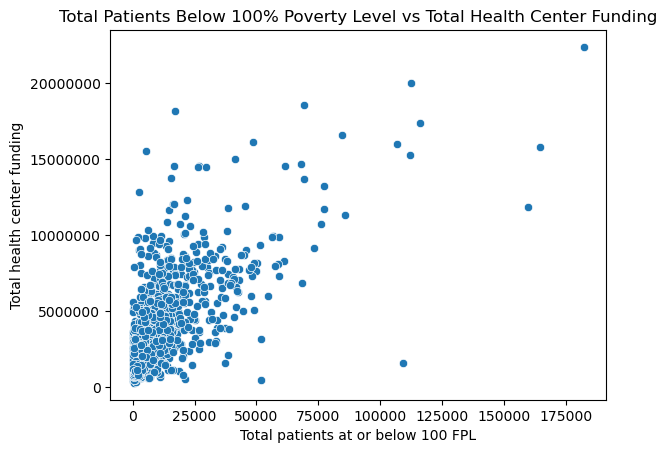

In [40]:
fix, ax = plt.subplots()

sns.scatterplot(x='fpl_100_below', y='total_hc_funding', data=health_centers)
plt.title('Total Patients Below 100% Poverty Level vs Total Health Center Funding')
plt.xlabel('Total patients at or below 100 FPL')
plt.ylabel('Total health center funding')
ax.ticklabel_format(style='plain', axis='both')

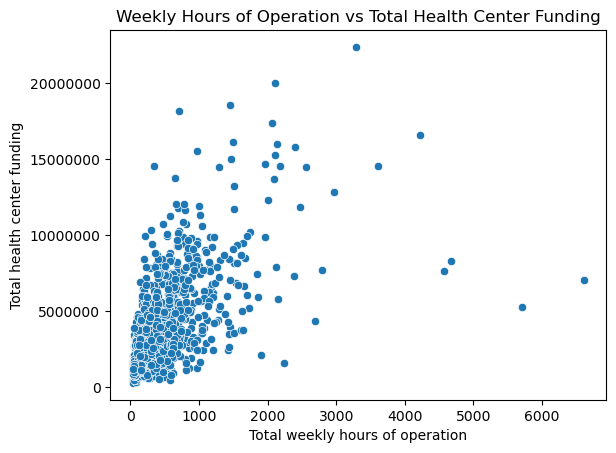

In [41]:
fix, ax = plt.subplots()

sns.scatterplot(x='TotalWeeklyHoursOfOperation', y='total_hc_funding', data=health_centers)
plt.title('Weekly Hours of Operation vs Total Health Center Funding')
plt.xlabel('Total weekly hours of operation')
plt.ylabel('Total health center funding')
ax.ticklabel_format(style='plain', axis='both')